AML Assignment 1 - Neural Network - IMDB data set

Name: Krishna Kumar Tavva             
Due Date: 07-Jul-2024

In [ ]:
# Using the IMDB data set
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Encoding the integer sequences via multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


# Storing input data in vectors

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Converting output lables into floating-point numerical values

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

17464789/17464789 [==============================] - 0s 0us/step


Model 1 - imdb_mod1, 2 Hidden Layers - 32 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy`

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model using rmsprop optimizer

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [ ]:
# Training the model

imdb_mod1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

imdb_dict = imdb_mod1.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5143 - accuracy: 0.7781 - val_loss: 0.3798 - val_accuracy: 0.8624
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3084 - accuracy: 0.8928 - val_loss: 0.2998 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2329 - accuracy: 0.9181 - val_loss: 0.3305 - val_accuracy: 0.8617
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1896 - accuracy: 0.9328 - val_loss: 0.3219 - val_accuracy: 0.8708
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1582 - accuracy: 0.9457 - val_loss: 0.3402 - val_accuracy: 0.8648
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1335 - accuracy: 0.9537 - val_loss: 0.2910 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1177 - accuracy: 0.9604 - val_loss: 0.3069 - val_accuracy: 0.8844
Epoch 8/20
30

In [ ]:
results_mod1 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.8559


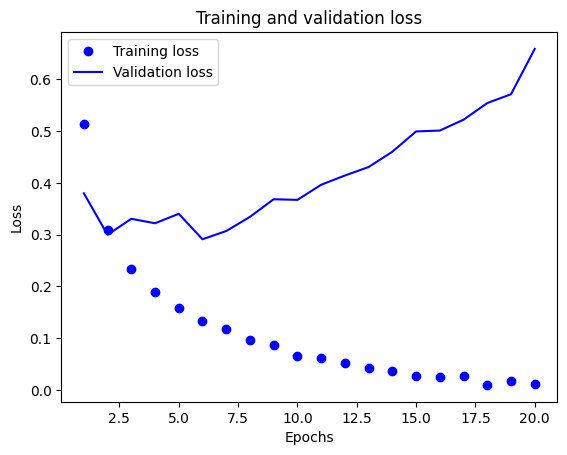

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

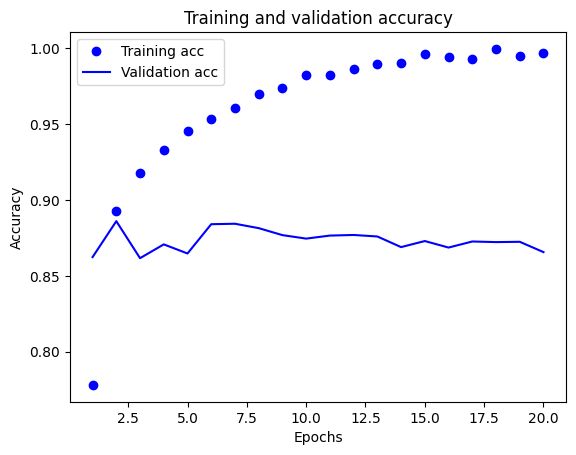

In [ ]:
# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 2 - imdb_mod2, 1 Hidden Layer - 32 Node, activation - relu, optimizer - rmsprop, loss - binary crossentropy

In [ ]:
# Retraining the model from scratch

model = keras.Sequential([
    layers.Dense(32,activation='relu'),
     layers.Dense(1,activation='sigmoid')
])

# Compiling the model using rmsprop

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model

imdb_mod2 = model.fit(x_train,
                       y_train,
                       epochs=20,
                       batch_size=512,
                      validation_data=(x_val,y_val))

imdb_dict = imdb_mod2.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
49/49 [==============================] - 2s 28ms/step - loss: 0.4352 - accuracy: 0.8273 - val_loss: 0.3324 - val_accuracy: 0.8664
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2763 - accuracy: 0.9018 - val_loss: 0.2476 - val_accuracy: 0.9104
Epoch 3/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2257 - accuracy: 0.9188 - val_loss: 0.1947 - val_accuracy: 0.9342
Epoch 4/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1959 - accuracy: 0.9312 - val_loss: 0.1725 - val_accuracy: 0.9409
Epoch 5/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1778 - accuracy: 0.9359 - val_loss: 0.1732 - val_accuracy: 0.9379
Epoch 6/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1625 - accuracy: 0.9437 - val_loss: 0.1402 - val_accuracy: 0.9550
Epoch 7/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1483 - accuracy: 0.9487 - val_loss: 0.1297 - val_accuracy: 0.9585
Epoch 8/20
49/49 [=

In [ ]:
results_mod2 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4491 - accuracy: 0.8645


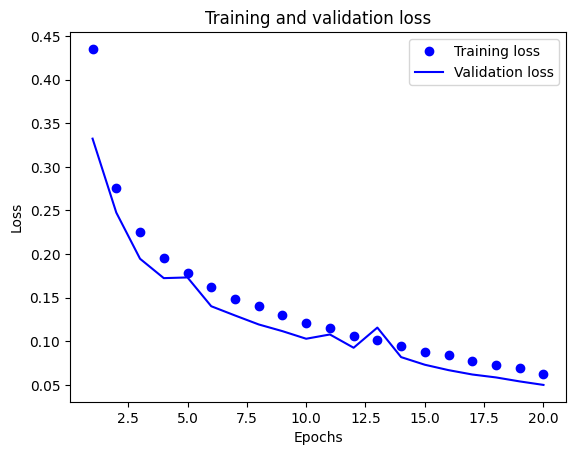

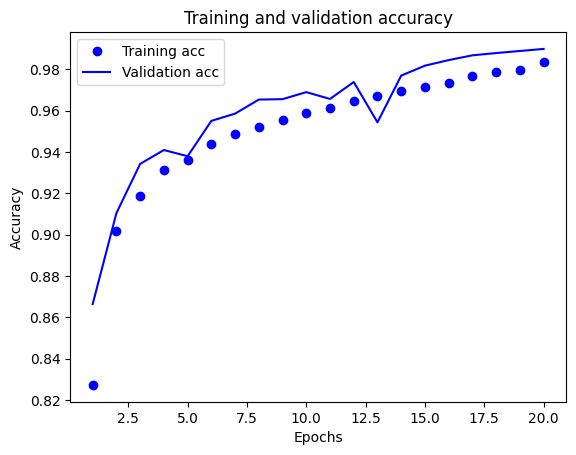

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 3 - imdb_mod3, 3 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy


In [ ]:
model = keras.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

# Training the model

imdb_mod3 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod3.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5236 - accuracy: 0.7553 - val_loss: 0.3687 - val_accuracy: 0.8530
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3063 - accuracy: 0.8845 - val_loss: 0.3222 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2253 - accuracy: 0.9188 - val_loss: 0.2749 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1811 - accuracy: 0.9339 - val_loss: 0.2922 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1413 - accuracy: 0.9506 - val_loss: 0.2928 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1175 - accuracy: 0.9591 - val_loss: 0.3430 - val_accuracy: 0.8716
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0943 - accuracy: 0.9685 - val_loss: 0.3313 - val_accuracy: 0.8821
Epoch 8/20
30/

In [ ]:
results_mod3 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7338 - accuracy: 0.8617


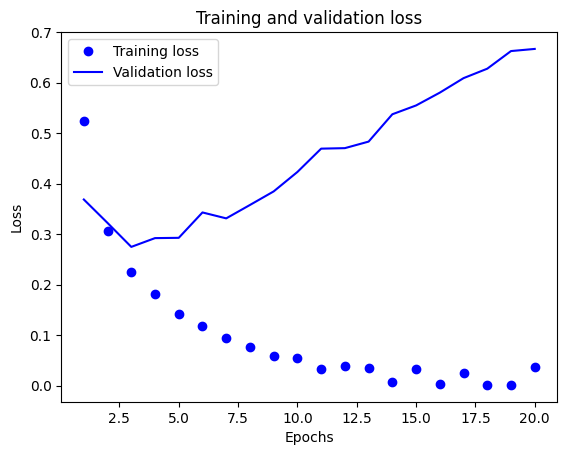

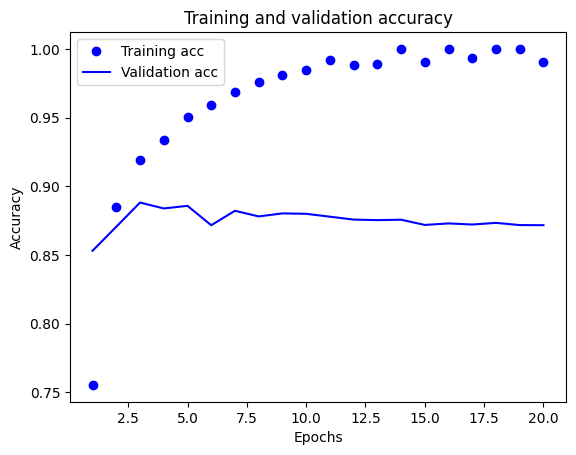

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 4 - imdb_mod4, 2 Hidden Layers - 64 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy

In [ ]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss='binary_crossentropy',
             metrics=["accuracy"])

# Training the model

imdb_mod4 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod4.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5130 - accuracy: 0.7525 - val_loss: 0.3811 - val_accuracy: 0.8465
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3101 - accuracy: 0.8823 - val_loss: 0.2883 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2182 - accuracy: 0.9211 - val_loss: 0.2789 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1789 - accuracy: 0.9357 - val_loss: 0.4441 - val_accuracy: 0.8277
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1553 - accuracy: 0.9426 - val_loss: 0.4371 - val_accuracy: 0.8381
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1282 - accuracy: 0.9547 - val_loss: 0.3032 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1041 - accuracy: 0.9639 - val_loss: 0.3654 - val_accuracy: 0.8679
Epoch 8/20
30

In [ ]:
results_mod4 = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.6502 - accuracy: 0.8641


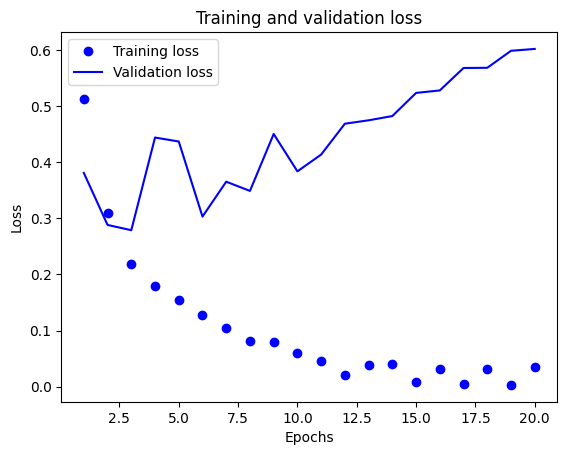

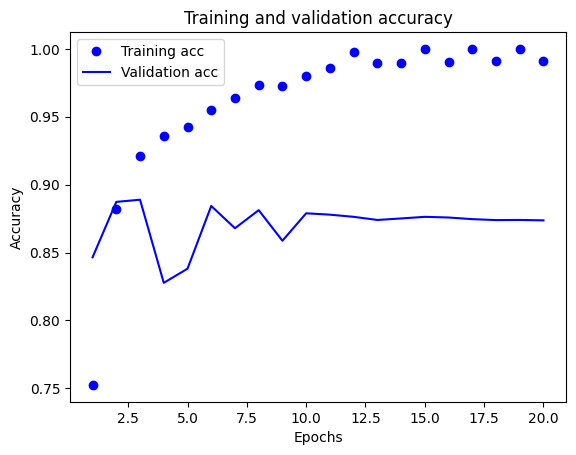

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 5 - imdb_mod5, 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse

In [ ]:
model = keras.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss="mse",
             metrics=["accuracy"])

# Training the model

imdb_mod5 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod5.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.1750 - accuracy: 0.7610 - val_loss: 0.1319 - val_accuracy: 0.8274
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0989 - accuracy: 0.8833 - val_loss: 0.0993 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0738 - accuracy: 0.9129 - val_loss: 0.0974 - val_accuracy: 0.8663
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9239 - val_loss: 0.0886 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0523 - accuracy: 0.9413 - val_loss: 0.0864 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0461 - accuracy: 0.9474 - val_loss: 0.0859 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0404 - accuracy: 0.9531 - val_loss: 0.0845 - val_accuracy: 0.8849
Epoch 8/20
30/

In [ ]:
results_mod5 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.8660


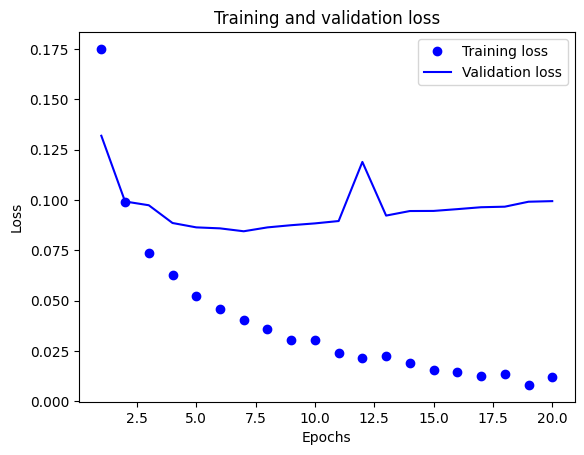

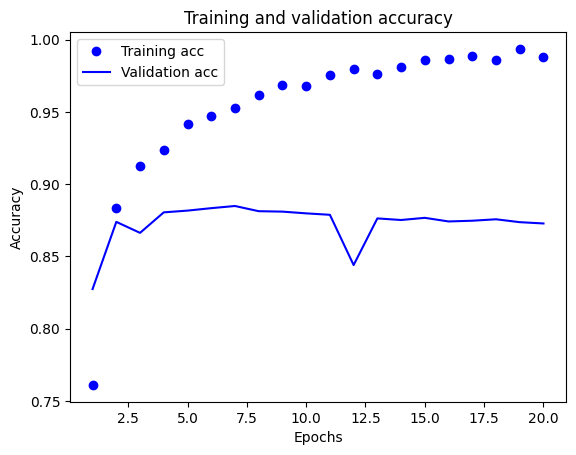

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 6 - imdb_mod6, 2 Hidden Layers - 32 Nodes, activation - tanh, optimizer - rmsprop, loss - binary crossentropy

In [ ]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh'),
    layers.Dense(32,activation='tanh'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss='binary_crossentropy',
             metrics=["accuracy"])

# Training the model

imdb_mod6 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod6.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.4873 - accuracy: 0.7718 - val_loss: 0.3474 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2763 - accuracy: 0.8931 - val_loss: 0.2768 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1982 - accuracy: 0.9239 - val_loss: 0.3146 - val_accuracy: 0.8740
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1486 - accuracy: 0.9452 - val_loss: 0.2984 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1353 - accuracy: 0.9497 - val_loss: 0.3374 - val_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1021 - accuracy: 0.9636 - val_loss: 0.4291 - val_accuracy: 0.8569
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0786 - accuracy: 0.9731 - val_loss: 0.3955 - val_accuracy: 0.8757
Epoch 8/20
30/3

In [ ]:
results_mod6 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7953 - accuracy: 0.8534


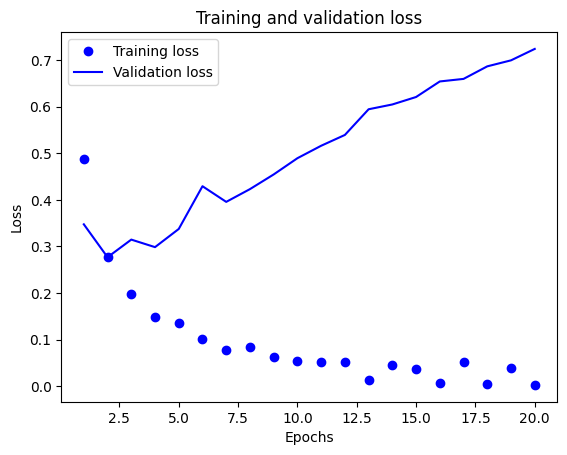

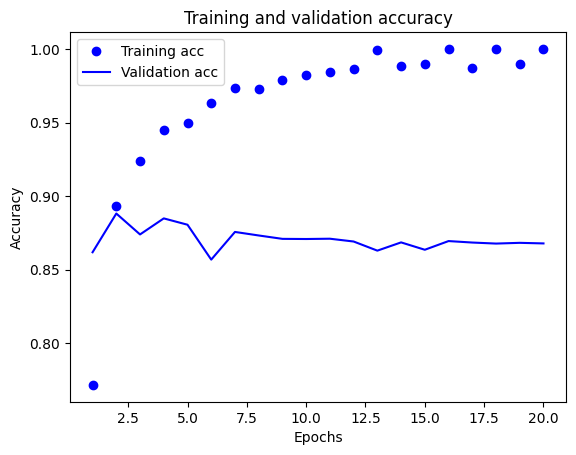

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 7 - imdb_mod7, 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropuout = 0.5

In [ ]:
model = keras.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(32,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss='binary_crossentropy',
             metrics=["accuracy"])

# Training the model

imdb_mod7 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod7.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6391 - accuracy: 0.6295 - val_loss: 0.5354 - val_accuracy: 0.8305
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5085 - accuracy: 0.7869 - val_loss: 0.4175 - val_accuracy: 0.8604
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4098 - accuracy: 0.8510 - val_loss: 0.3476 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3442 - accuracy: 0.8854 - val_loss: 0.3307 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2845 - accuracy: 0.9081 - val_loss: 0.2944 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2503 - accuracy: 0.9189 - val_loss: 0.2911 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2110 - accuracy: 0.9359 - val_loss: 0.2973 - val_accuracy: 0.8861
Epoch 8/20
30

In [ ]:
results_mod7 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6545 - accuracy: 0.8744


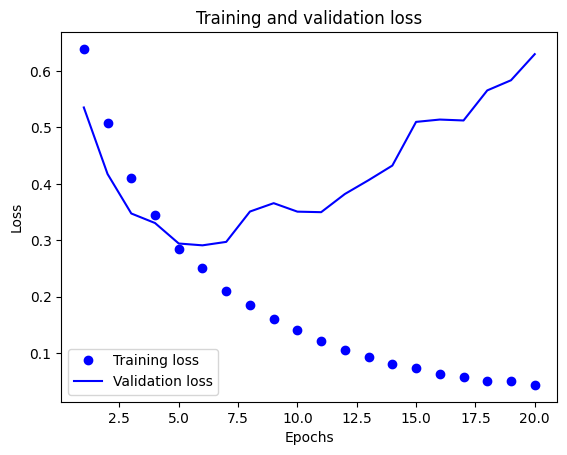

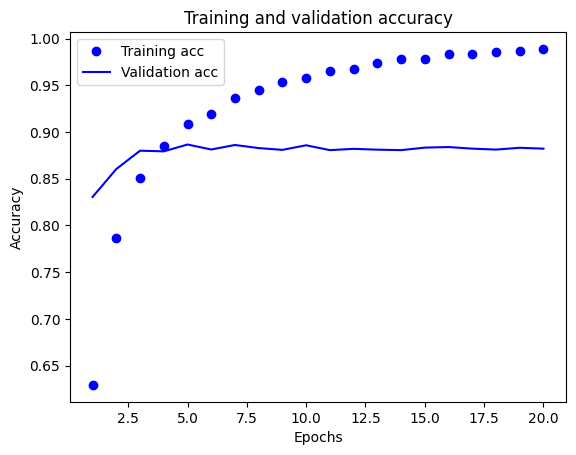

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 8 - imdb_mod8, 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy, regularisation - l2 (0.001)

In [ ]:
model = keras.Sequential([
    layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model

imdb_mod8 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data = (x_val,y_val))

imdb_dict = imdb_mod8.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5929 - accuracy: 0.7654 - val_loss: 0.4435 - val_accuracy: 0.8741
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3819 - accuracy: 0.8943 - val_loss: 0.3801 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3153 - accuracy: 0.9143 - val_loss: 0.3536 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2722 - accuracy: 0.9297 - val_loss: 0.3793 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2457 - accuracy: 0.9398 - val_loss: 0.3800 - val_accuracy: 0.8780
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2362 - accuracy: 0.9427 - val_loss: 0.3739 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2225 - accuracy: 0.9459 - val_loss: 0.3685 - val_accuracy: 0.8821
Epoch 8/20
30

In [ ]:
results_mod8 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.8572


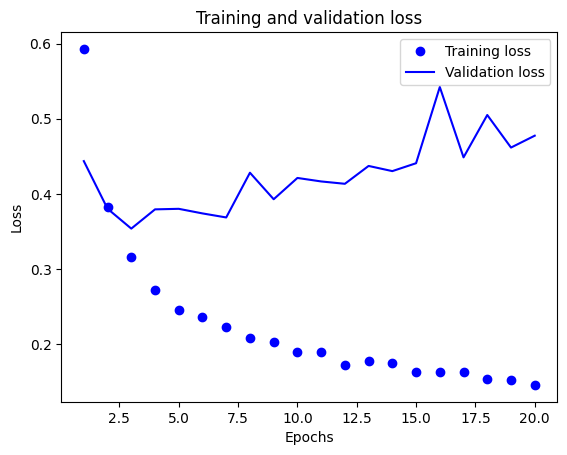

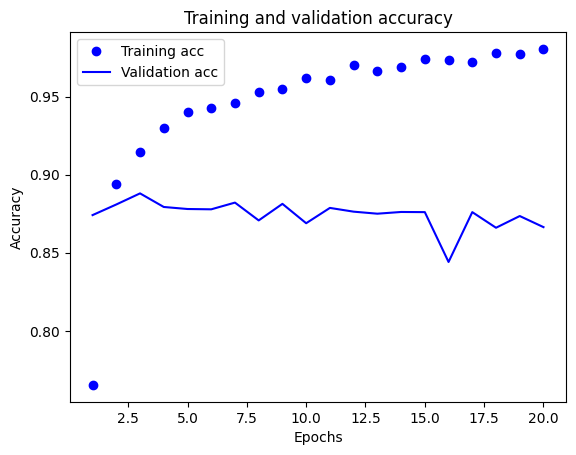

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Test Evaluation**

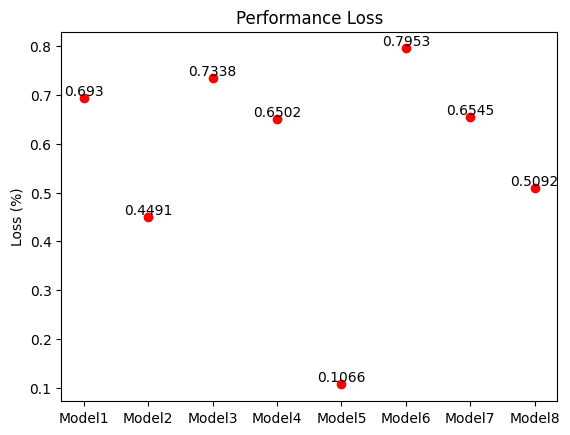

In [ ]:
Models = ('Model1','Model2','Model3', 'Model4', 'Model5','Model6','Model7', 'Model8')
Loss = (0.6930, 0.4491, 0.7338, 0.6502, 0.1066, 0.7953, 0.6545, 0.5092)

plt.scatter(Models,Loss,color='red')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

**Observations**:

Model 5 is the only model with least loss value during the evaluation on the test set.

Model 5 was built using 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse.

**Accuracy Evaluation**

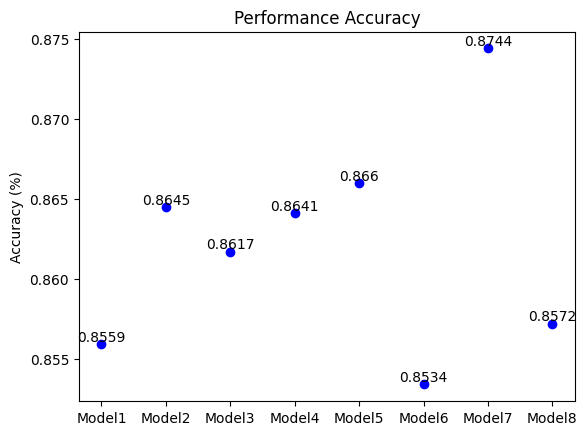

In [ ]:
Models = ('Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8')
Accuracy = (0.8559, 0.8645, 0.8617, 0.8641, 0.8660, 0.8534, 0.8744, 0.8572)

plt.scatter(Models,Accuracy,color='blue')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

**Observations**:

Model 5 and Model 7 are the models with the highest accuracy among all the other models.

Model 5 was built using 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse.

Model 7 was built 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropuout = 0.5

**Conclusion**

To decide the best model, there are two ways

i) model with **Least Loss** on the Test Set with considerable accuracy.

the best model is **Model 5**

i.e. model with 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse.

ii) model with **Highest Accuracy** on the Test Set.

the best model is **Model 7**

i.e. model with 2 hidden layers, 32 nodes per layer, activated with relu, dropout rate of 0.5 per layer, optimizer being rmsprop and loss function being binary crossentropy resulted in the highest accuracy among all the other models i.e. 87.44%.

In reality, mse isn't a good loss function to be used for binary/multi-class classification since it is is a good loss function for regression based problems. Therefore, the best model is the one with the highest accuracy i.e. **Model 7**